In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import seaborn as sn

In [2]:
from sklearn.metrics import precision_score,recall_score,f1_score,roc_auc_score,precision_recall_curve
from sklearn.metrics import confusion_matrix,balanced_accuracy_score,accuracy_score,f1_score
def perf_measure(y_actual, y_hat):
    TN, FP, FN, TP = confusion_matrix(y_actual, y_hat).ravel()
    return(TP, FP, TN, FN)

def TSS_score(y_actual,y_pred):
    
    TP,FP,TN,FN=perf_measure(y_actual,y_pred)
    rec=TP/(TP+FN)
    TSSscore=rec-(FP/(TN+FP))
    return TSSscore

def HSS_score(y_actual,y_pred):
    TP,FP,TN,FN=perf_measure(y_actual,y_pred)
    HSSscore=(2*(TP*TN-FP*FN))/((TP+FN)*(FN+TN)+(TP+FP)*(FP+TN))
    return HSSscore

In [3]:
def counttypes(data,label):
    dups = data.pivot_table(index = [label], aggfunc ='size')
    print(len(dups))
    return dups

In [4]:
dataset=pd.read_csv('dataset.csv') #Reading the dataset

In [5]:
counttypes(dataset,'label') #A function to count contents 

2


label
Negative    116650
Positive     29712
dtype: int64

In [6]:
dataset

,T_REC,label,Flare,HARPNUM,NOAA_AR,TOTUSJH,TOTPOT,TOTUSJZ,ABSNJZH,SAVNCPP,...,MEANJZH,MEANJZD,MEANALP,TOTBSQ,TOTFZ,EPSZ,TOTFY,TOTFX,EPSY,EPSX
0,2012-01-01T00:00:00.000,Negative,N,1237,11386,407.243,9.172299e+22,8.680811e+12,41.183,6.223243e+11,...,0.004414,-0.002426,0.010801,1.048000e+10,-82.717,-0.0150,819.73,-1593.20,-0.0742,0.1442
1,2012-01-01T01:00:00.000,Negative,N,1237,11386,398.263,9.080041e+22,8.534477e+12,47.963,7.273996e+11,...,0.005200,0.155049,0.012536,1.047100e+10,-106.630,-0.0193,798.59,-1611.50,-0.0723,0.1460
2,2012-01-01T02:00:00.000,Negative,N,1237,11386,406.574,9.153578e+22,8.614420e+12,45.893,1.019431e+12,...,0.005009,0.218747,0.012082,1.045300e+10,-82.607,-0.0150,755.09,-1636.40,-0.0685,0.1485
3,2012-01-01T03:00:00.000,Negative,N,1237,11386,395.305,8.994001e+22,8.459343e+12,44.156,7.608218e+11,...,0.004834,0.163723,0.011701,1.049500e+10,-102.940,-0.0186,798.81,-1688.60,-0.0722,0.1526
4,2012-01-01T04:00:00.000,Negative,N,1237,11386,400.439,9.008860e+22,8.828972e+12,46.327,9.189487e+11,...,0.004790,0.186776,0.012192,1.050200e+10,-125.300,-0.0226,808.57,-1755.40,-0.0730,0.1585
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146357,2020-12-30T08:00:00.000,Negative,N,7513,12795,477.790,5.818898e+22,9.451193e+12,14.976,4.390137e+12,...,-0.001867,1.075516,-0.004561,6.750100e+09,-695.200,-0.1954,666.25,-658.83,-0.0936,0.0926
146358,2020-12-30T09:00:00.000,Negative,N,7513,12795,487.443,6.005528e+22,9.404827e+12,9.260,2.713251e+12,...,-0.001243,0.715660,-0.002736,6.563200e+09,-834.880,-0.2413,609.50,-606.64,-0.0881,0.0877
146359,2020-12-30T10:00:00.000,Negative,N,7513,12795,452.036,5.712259e+22,8.587856e+12,6.737,1.661519e+12,...,-0.000901,0.436926,-0.002030,6.727600e+09,-758.890,-0.2140,652.76,-710.96,-0.0920,0.1002
146360,2020-12-30T11:00:00.000,Negative,N,7513,12795,422.701,5.601215e+22,8.314149e+12,17.376,2.267735e+12,...,-0.002208,0.566384,-0.005623,6.664200e+09,-643.770,-0.1832,664.35,-813.88,-0.0945,0.1158


### Code to change the negative and positive labels to 0 and 1 target values for classification model

In [7]:
target=[]
labels=dataset['label']
for i in labels:
    if i == 'Positive':
        target.append(1)
    if i == 'Negative':
        target.append(0)

In [8]:
dataset['Target']=target # Added the target array to the dataset

In [9]:
dataset

,T_REC,label,Flare,HARPNUM,NOAA_AR,TOTUSJH,TOTPOT,TOTUSJZ,ABSNJZH,SAVNCPP,...,MEANJZD,MEANALP,TOTBSQ,TOTFZ,EPSZ,TOTFY,TOTFX,EPSY,EPSX,Target
0,2012-01-01T00:00:00.000,Negative,N,1237,11386,407.243,9.172299e+22,8.680811e+12,41.183,6.223243e+11,...,-0.002426,0.010801,1.048000e+10,-82.717,-0.0150,819.73,-1593.20,-0.0742,0.1442,0
1,2012-01-01T01:00:00.000,Negative,N,1237,11386,398.263,9.080041e+22,8.534477e+12,47.963,7.273996e+11,...,0.155049,0.012536,1.047100e+10,-106.630,-0.0193,798.59,-1611.50,-0.0723,0.1460,0
2,2012-01-01T02:00:00.000,Negative,N,1237,11386,406.574,9.153578e+22,8.614420e+12,45.893,1.019431e+12,...,0.218747,0.012082,1.045300e+10,-82.607,-0.0150,755.09,-1636.40,-0.0685,0.1485,0
3,2012-01-01T03:00:00.000,Negative,N,1237,11386,395.305,8.994001e+22,8.459343e+12,44.156,7.608218e+11,...,0.163723,0.011701,1.049500e+10,-102.940,-0.0186,798.81,-1688.60,-0.0722,0.1526,0
4,2012-01-01T04:00:00.000,Negative,N,1237,11386,400.439,9.008860e+22,8.828972e+12,46.327,9.189487e+11,...,0.186776,0.012192,1.050200e+10,-125.300,-0.0226,808.57,-1755.40,-0.0730,0.1585,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146357,2020-12-30T08:00:00.000,Negative,N,7513,12795,477.790,5.818898e+22,9.451193e+12,14.976,4.390137e+12,...,1.075516,-0.004561,6.750100e+09,-695.200,-0.1954,666.25,-658.83,-0.0936,0.0926,0
146358,2020-12-30T09:00:00.000,Negative,N,7513,12795,487.443,6.005528e+22,9.404827e+12,9.260,2.713251e+12,...,0.715660,-0.002736,6.563200e+09,-834.880,-0.2413,609.50,-606.64,-0.0881,0.0877,0
146359,2020-12-30T10:00:00.000,Negative,N,7513,12795,452.036,5.712259e+22,8.587856e+12,6.737,1.661519e+12,...,0.436926,-0.002030,6.727600e+09,-758.890,-0.2140,652.76,-710.96,-0.0920,0.1002,0
146360,2020-12-30T11:00:00.000,Negative,N,7513,12795,422.701,5.601215e+22,8.314149e+12,17.376,2.267735e+12,...,0.566384,-0.005623,6.664200e+09,-643.770,-0.1832,664.35,-813.88,-0.0945,0.1158,0


# Data processing

## Dividing dataset to create feature set

Dividing the dataset by removing unwanter columns like time, Flare, HARPNUM etc. to create the feature set and label set for our classification models

In [10]:
features=dataset.drop(columns=['Flare','HARPNUM','NOAA_AR','label','Target'],axis=1)
labels=dataset.Target


In [11]:
features

,T_REC,TOTUSJH,TOTPOT,TOTUSJZ,ABSNJZH,SAVNCPP,USFLUX,AREA_ACR,MEANPOT,R_VALUE,...,MEANJZH,MEANJZD,MEANALP,TOTBSQ,TOTFZ,EPSZ,TOTFY,TOTFX,EPSY,EPSX
0,2012-01-01T00:00:00.000,407.243,9.172299e+22,8.680811e+12,41.183,6.223243e+11,6.019818e+21,341.861847,7401.804,3.537,...,0.004414,-0.002426,0.010801,1.048000e+10,-82.717,-0.0150,819.73,-1593.20,-0.0742,0.1442
1,2012-01-01T01:00:00.000,398.263,9.080041e+22,8.534477e+12,47.963,7.273996e+11,6.030505e+21,344.527863,7412.354,3.563,...,0.005200,0.155049,0.012536,1.047100e+10,-106.630,-0.0193,798.59,-1611.50,-0.0723,0.1460
2,2012-01-01T02:00:00.000,406.574,9.153578e+22,8.614420e+12,45.893,1.019431e+12,6.012032e+21,338.185089,7522.951,3.347,...,0.005009,0.218747,0.012082,1.045300e+10,-82.607,-0.0150,755.09,-1636.40,-0.0685,0.1485
3,2012-01-01T03:00:00.000,395.305,8.994001e+22,8.459343e+12,44.156,7.608218e+11,6.016722e+21,335.004089,7413.646,3.500,...,0.004834,0.163723,0.011701,1.049500e+10,-102.940,-0.0186,798.81,-1688.60,-0.0722,0.1526
4,2012-01-01T04:00:00.000,400.439,9.008860e+22,8.828972e+12,46.327,9.189487e+11,6.204937e+21,334.617218,7014.327,3.300,...,0.004790,0.186776,0.012192,1.050200e+10,-125.300,-0.0226,808.57,-1755.40,-0.0730,0.1585
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146357,2020-12-30T08:00:00.000,477.790,5.818898e+22,9.451193e+12,14.976,4.390137e+12,5.016500e+21,348.258240,5461.924,3.167,...,-0.001867,1.075516,-0.004561,6.750100e+09,-695.200,-0.1954,666.25,-658.83,-0.0936,0.0926
146358,2020-12-30T09:00:00.000,487.443,6.005528e+22,9.404827e+12,9.260,2.713251e+12,5.047444e+21,353.975311,6069.099,3.373,...,-0.001243,0.715660,-0.002736,6.563200e+09,-834.880,-0.2413,609.50,-606.64,-0.0881,0.0877
146359,2020-12-30T10:00:00.000,452.036,5.712259e+22,8.587856e+12,6.737,1.661519e+12,4.974748e+21,350.328308,5754.960,3.409,...,-0.000901,0.436926,-0.002030,6.727600e+09,-758.890,-0.2140,652.76,-710.96,-0.0920,0.1002
146360,2020-12-30T11:00:00.000,422.701,5.601215e+22,8.314149e+12,17.376,2.267735e+12,4.866605e+21,351.265625,5359.141,3.437,...,-0.002208,0.566384,-0.005623,6.664200e+09,-643.770,-0.1832,664.35,-813.88,-0.0945,0.1158


## Normalisation

As each of the features are varying range, each of them may hold baised weightage when the model is trained. To avoid that normalisation is used to bring the values of all features into a fixed range.

In [12]:
cols=features.columns[1:]
print(len(cols))
for i in cols:
    scale = StandardScaler().fit(features[[i]])
    features[i] = scale.transform(features[[i]])

25


In [13]:
features

,T_REC,TOTUSJH,TOTPOT,TOTUSJZ,ABSNJZH,SAVNCPP,USFLUX,AREA_ACR,MEANPOT,R_VALUE,...,MEANJZH,MEANJZD,MEANALP,TOTBSQ,TOTFZ,EPSZ,TOTFY,TOTFX,EPSY,EPSX
0,2012-01-01T00:00:00.000,-0.421515,-0.290092,-0.428074,-0.286547,-0.536013,-0.469603,-0.353496,0.522816,0.447487,...,0.648683,-0.320886,0.536431,-0.330427,0.737613,1.065942,0.433233,-0.453659,-0.891191,0.824480
1,2012-01-01T01:00:00.000,-0.429810,-0.292793,-0.435158,-0.251783,-0.521027,-0.468874,-0.349378,0.525456,0.464161,...,0.757863,0.044741,0.616854,-0.330854,0.727412,1.040597,0.419565,-0.459136,-0.869759,0.835564
2,2012-01-01T02:00:00.000,-0.422133,-0.290640,-0.431288,-0.262397,-0.479380,-0.470134,-0.359173,0.553128,0.325637,...,0.731365,0.192635,0.595808,-0.331709,0.737660,1.065942,0.391439,-0.466588,-0.826893,0.850960
3,2012-01-01T03:00:00.000,-0.432542,-0.295312,-0.438795,-0.271303,-0.516261,-0.469814,-0.364086,0.525779,0.423758,...,0.707032,0.064881,0.578171,-0.329714,0.728986,1.044723,0.419707,-0.482210,-0.868631,0.876208
4,2012-01-01T04:00:00.000,-0.427800,-0.294877,-0.420902,-0.260171,-0.493710,-0.456977,-0.364683,0.425865,0.295495,...,0.700997,0.118405,0.600897,-0.329382,0.719448,1.021146,0.426018,-0.502201,-0.877655,0.912540
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146357,2020-12-30T08:00:00.000,-0.356354,-0.388269,-0.390782,-0.420920,0.001329,-0.538036,-0.343618,0.037435,0.210200,...,-0.223346,2.181886,-0.175601,-0.507611,0.476348,0.002616,0.333999,-0.174026,-1.110031,0.506723
146358,2020-12-30T09:00:00.000,-0.347438,-0.382805,-0.393026,-0.450229,-0.237818,-0.535925,-0.334789,0.189357,0.342311,...,-0.136691,1.346372,-0.091003,-0.516490,0.416766,-0.267930,0.297306,-0.158407,-1.047989,0.476548
146359,2020-12-30T10:00:00.000,-0.380142,-0.391391,-0.432574,-0.463165,-0.387809,-0.540884,-0.340421,0.110756,0.365398,...,-0.089299,0.699206,-0.058286,-0.508680,0.449180,-0.107017,0.325276,-0.189627,-1.091982,0.553524
146360,2020-12-30T11:00:00.000,-0.407238,-0.394642,-0.445824,-0.408615,-0.301355,-0.548260,-0.338974,0.011717,0.383355,...,-0.270694,0.999781,-0.224786,-0.511692,0.498287,0.074526,0.332770,-0.220428,-1.120183,0.649590


## Creating train and test data set

In [14]:
x_train, x_test, y_train, y_test = train_test_split(features,labels, test_size=0.2)

#### We cannot use the above method because, as solar flare prediction is time dependant, we need to separate the train and test sets chronologically. So all the measurement before 2016-12-31T59:59:59.000 will belong the trainset while, measurements after 2016-12-31T59:59:59.000, will belong to test set

In [15]:
Trainset=dataset.loc[dataset.T_REC<='2016-12-31T59:59:59.000']
Testset=dataset.loc[dataset.T_REC>'2016-12-31T59:59:59.000']

In [16]:
x_train=Trainset.drop(columns=['T_REC','Flare','HARPNUM','NOAA_AR','label','Target'],axis=1)
x_test=Testset.drop(columns=['T_REC','Flare','HARPNUM','NOAA_AR','label','Target'],axis=1)
y_train=Trainset.Target
y_test=Testset.Target

# Classificartion using machine learning

Different models are tried out with the data collected and processing in the previous steps. The following models were used to train the datasets.
* Logistic Regression
* Stochastic Gradient
* Support Vector Machines
* K-Nearest Neighbor
* Random Forests

After the training the models, we calculate various metrics as listed below
 

Confusion matrix is also plotted along with the models to the amount of labels correctly predicted.

In [17]:
y_test.value_counts()

0    18993
1     1169
Name: Target, dtype: int64

## Logistic Regression

In [18]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter=500)
lr.fit(x_train, y_train)
y_pred_lr = lr.predict(x_test)

In [19]:
print(f"Test's accuracy             : {accuracy_score(y_test, y_pred_lr):.5f}")
print(f"Test's Precision            : {precision_score(y_test, y_pred_lr):.5f}")
print(f"Test's Recall               : {recall_score(y_test, y_pred_lr):.5f}")
print(f"Test's F1 Measure           : {f1_score(y_test, y_pred_lr):.5f}")
print(f"Test's ROC AUC              : {roc_auc_score(y_test, y_pred_lr):.5f}")
print(f"Test's BAAC                 : {balanced_accuracy_score(y_test, y_pred_lr):.5f}")
print(f"Test's Heidke Skill Score   : {HSS_score(y_test, y_pred_lr):.5f}")
print(f"Test's True Skill statistic : {TSS_score(y_test, y_pred_lr):.5f}")


Test's accuracy             : 0.86093
Test's Precision            : 0.19462
Test's Recall               : 0.44568
Test's F1 Measure           : 0.27093
Test's ROC AUC              : 0.66608
Test's BAAC                 : 0.66608
Test's Heidke Skill Score   : 0.20692
Test's True Skill statistic : 0.33216


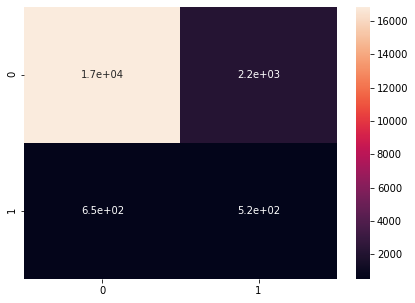

In [20]:
plt.figure(figsize=[7,5])
cm_LR=confusion_matrix(y_test,y_pred_lr)
sn.heatmap(cm_LR, annot=True)
plt.show()

## Stochastic Gradient

In [21]:
from sklearn.linear_model import SGDClassifier

sgd = SGDClassifier(loss="modified_huber", shuffle = True, random_state=42)
sgd.fit(x_train, y_train)

y_pred_sgd = sgd.predict(x_test)

In [22]:
print(f"Test's accuracy             : {accuracy_score(y_test, y_pred_sgd):.5f}")
print(f"Test's Precision            : {precision_score(y_test, y_pred_sgd):.5f}")
print(f"Test's Recall               : {recall_score(y_test, y_pred_sgd):.5f}")
print(f"Test's F1 Measure           : {f1_score(y_test, y_pred_sgd):.5f}")
print(f"Test's ROC AUC              : {roc_auc_score(y_test, y_pred_sgd):.5f}")
print(f"Test's BAAC                 : {balanced_accuracy_score(y_test, y_pred_sgd):.5f}")
print(f"Test's Heidke Skill Score   : {HSS_score(y_test, y_pred_sgd):.5f}")
print(f"Test's True Skill statistic : {TSS_score(y_test, y_pred_sgd):.5f}")


Test's accuracy             : 0.31331
Test's Precision            : 0.07337
Test's Recall               : 0.93242
Test's F1 Measure           : 0.13604
Test's ROC AUC              : 0.60381
Test's BAAC                 : 0.60381
Test's Heidke Skill Score   : 0.03197
Test's True Skill statistic : 0.20763


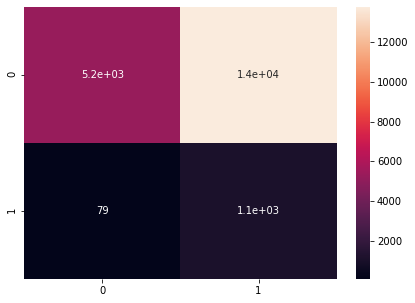

In [23]:
plt.figure(figsize=[7,5])
cm_sgd=confusion_matrix(y_test,y_pred_sgd)
sn.heatmap(cm_sgd, annot=True)
plt.show()

## Support Vector Machine

In [64]:
from sklearn.svm import SVC


In [ ]:
from sklearn.svm import SVC

svm = SVC(kernel='rbf',C=1,gamma='auto',coef0=0.001,class_weight='balanced',verbose=True)
svm.fit(x_train, y_train)

y_pred_svm = svm.predict(x_test)

[LibSVM]........................................

In [ ]:
print(f"Test's accuracy             : {accuracy_score(y_test, y_pred_svm):.5f}")
print(f"Test's Precision            : {precision_score(y_test, y_pred_svm):.5f}")
print(f"Test's Recall               : {recall_score(y_test, y_pred_svm):.5f}")
print(f"Test's F1 Measure           : {f1_score(y_test, y_pred_svm):.5f}")
print(f"Test's ROC AUC              : {roc_auc_score(y_test, y_pred_svm):.5f}")
print(f"Test's BAAC                 : {balanced_accuracy_score(y_test, y_pred_svm):.5f}")
print(f"Test's Heidke Skill Score   : {HSS_score(y_test, y_pred_svm):.5f}")
print(f"Test's True Skill statistic : {TSS_score(y_test, y_pred_svm):.5f}")


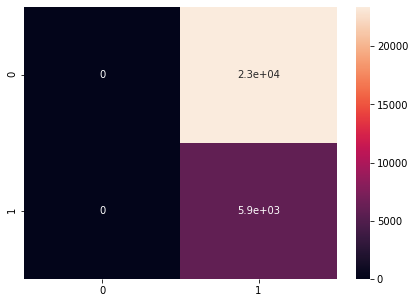

In [23]:
plt.figure(figsize=[7,5])
cm_svm=confusion_matrix(y_test,y_pred_svm)
sn.heatmap(cm_svm, annot=True)
plt.show()

## K-Nearest Neighbors

In [24]:
from sklearn.neighbors import KNeighborsClassifier

neigh = KNeighborsClassifier(n_neighbors=10)
neigh.fit(x_train, y_train)

y_pred_knn=neigh.predict(x_test)

In [25]:
print(f"Test's accuracy             : {accuracy_score(y_test, y_pred_knn):.5f}")
print(f"Test's Precision            : {precision_score(y_test, y_pred_knn):.5f}")
print(f"Test's Recall               : {recall_score(y_test, y_pred_knn):.5f}")
print(f"Test's F1 Measure           : {f1_score(y_test, y_pred_knn):.5f}")
print(f"Test's ROC AUC              : {roc_auc_score(y_test, y_pred_knn):.5f}")
print(f"Test's BAAC                 : {balanced_accuracy_score(y_test, y_pred_knn):.5f}")
print(f"Test's Heidke Skill Score   : {HSS_score(y_test, y_pred_knn):.5f}")
print(f"Test's True Skill statistic : {TSS_score(y_test, y_pred_knn):.5f}")


Test's accuracy             : 0.91583
Test's Precision            : 0.30120
Test's Recall               : 0.34217
Test's F1 Measure           : 0.32038
Test's ROC AUC              : 0.64666
Test's BAAC                 : 0.64666
Test's Heidke Skill Score   : 0.27572
Test's True Skill statistic : 0.29331


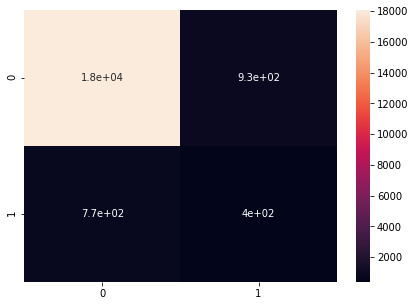

In [26]:
plt.figure(figsize=[7,5])
cm_knn=confusion_matrix(y_test,y_pred_knn)
sn.heatmap(cm_knn, annot=True)
plt.show()

## Random Forest

In [27]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()
rfc.fit(x_train, y_train)

y_pred_rfc = rfc.predict(x_test)

In [28]:
print(f"Test's accuracy             : {accuracy_score(y_test, y_pred_rfc):.5f}")
print(f"Test's Precision            : {precision_score(y_test, y_pred_rfc):.5f}")
print(f"Test's Recall               : {recall_score(y_test, y_pred_rfc):.5f}")
print(f"Test's F1 Measure           : {f1_score(y_test, y_pred_rfc):.5f}")
print(f"Test's ROC AUC              : {roc_auc_score(y_test, y_pred_rfc):.5f}")
print(f"Test's BAAC                 : {balanced_accuracy_score(y_test, y_pred_rfc):.5f}")
print(f"Test's Heidke Skill Score   : {HSS_score(y_test, y_pred_rfc):.5f}")
print(f"Test's True Skill statistic : {TSS_score(y_test, y_pred_rfc):.5f}")


Test's accuracy             : 0.92645
Test's Precision            : 0.39630
Test's Recall               : 0.51326
Test's F1 Measure           : 0.44726
Test's ROC AUC              : 0.73257
Test's BAAC                 : 0.73257
Test's Heidke Skill Score   : 0.40856
Test's True Skill statistic : 0.46514


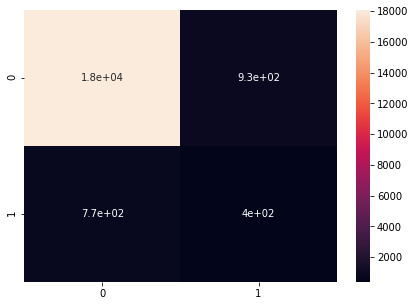

In [29]:
plt.figure(figsize=[7,5])
cm_rfc=confusion_matrix(y_test,y_pred_rfc)
sn.heatmap(cm_knn, annot=True)
plt.show()

In [30]:
score_data=pd.Dataframe()
score

AttributeError: module 'pandas' has no attribute 'Dataframe'